In [78]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

digits = load_digits()
print(digits.data.shape)
dir(digits)


(1797, 64)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

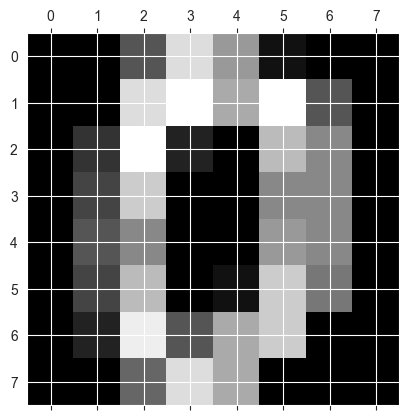

In [79]:
plt.matshow(digits.images[0], cmap="gray")
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [84]:
digits.target
print(digits.target_names[2])

2


In [81]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [85]:



X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
acc_linear = svm_linear.score(X_test, y_test)
print(f"Linear SVM Accuracy: {acc_linear}")


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
acc_rbf = svm_rbf.score(X_test, y_test)
print(f"Non-Linear SVM (RBF) Accuracy: {acc_rbf}")

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
acc_sigmoid = svm_sigmoid.score(X_test, y_test)
print(f"Non-Linear SVM (Sigmoid) Accuracy: {acc_sigmoid}")

svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
acc_svm_poly = svm_poly.score(X_test, y_test)
print(f"Non-Linear SVM (Poly) Accuracy: {acc_svm_poly}")



Linear SVM Accuracy: 0.9777777777777777
Non-Linear SVM (RBF) Accuracy: 0.9861111111111112
Non-Linear SVM (Sigmoid) Accuracy: 0.9
Non-Linear SVM (Poly) Accuracy: 0.9916666666666667



--- Sample 1 ---


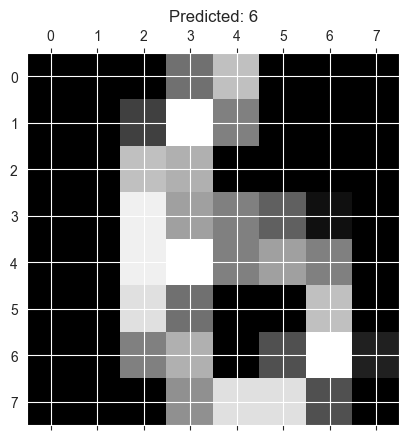

Actual Label: 6
Predicted Label: 6

--- Sample 2 ---


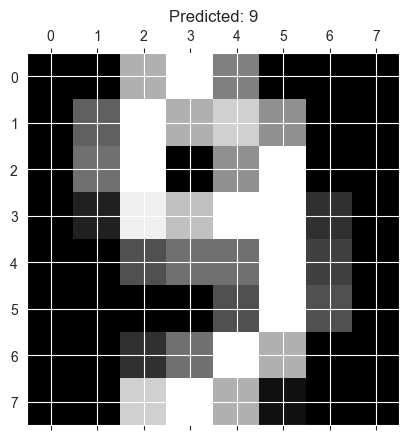

Actual Label: 9
Predicted Label: 9

--- Sample 3 ---


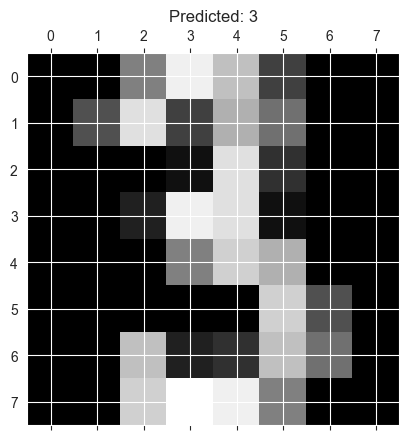

Actual Label: 3
Predicted Label: 3


In [76]:
import numpy as np

# Function to predict and display
def predict_digit(model, image_data, actual_label=None):
    # Reshape for prediction (1, 64)
    prediction = model.predict([image_data])
    
    # Reshape for display (8, 8)
    img_matrix = image_data.reshape(8, 8)
    
    plt.matshow(img_matrix, cmap='gray')
    plt.title(f"Predicted: {prediction[0]}")
    plt.show()
    
    if actual_label is not None:
        print(f"Actual Label: {actual_label}")
    print(f"Predicted Label: {prediction[0]}")

# Test with a few samples from the test set
for i in range(0, 3): # Check first 3 samples from test set
    print(f"\n--- Sample {i+1} ---")
    predict_digit(svm_rbf, X_test[i], y_test[i])

In [86]:
# SVM with Regularization (C) and Gamma

# Linear SVM (gamma ignored for linear kernel)
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
acc_linear = svm_linear.score(X_test, y_test)
print(f"Linear SVM (C=1.0) Accuracy: {acc_linear}")

# Non-Linear SVM (RBF) with C and gamma
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
acc_rbf = svm_rbf.score(X_test, y_test)
print(f"SVM RBF (C=1.0, gamma='scale') Accuracy: {acc_rbf}")

# Non-Linear SVM (Sigmoid) with C and gamma
svm_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='auto')
svm_sigmoid.fit(X_train, y_train)
acc_sigmoid = svm_sigmoid.score(X_test, y_test)
print(f"SVM Sigmoid (C=1.0, gamma='auto') Accuracy: {acc_sigmoid}")

# Non-Linear SVM (Poly) with C and gamma
svm_poly = SVC(kernel='poly', C=1.0, gamma='scale')
svm_poly.fit(X_train, y_train)
acc_poly = svm_poly.score(X_test, y_test)
print(f"SVM Poly (C=1.0, gamma='scale') Accuracy: {acc_poly}")

Linear SVM (C=1.0) Accuracy: 0.9777777777777777
SVM RBF (C=1.0, gamma='scale') Accuracy: 0.9861111111111112
SVM Sigmoid (C=1.0, gamma='auto') Accuracy: 0.07777777777777778
SVM Poly (C=1.0, gamma='scale') Accuracy: 0.9916666666666667
